# IMPORTAR LIBRERIAS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

#
___

# DATA SETS - LECTURA

In [2]:
df_academico = pd.read_csv("../01_data/02_processed/ds_academico.csv", sep=",") 
df_academico.head() 

,Daytime/evening attendance,Previous qualification (grade),Mother's qualification,Father's qualification,Admission grade,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Target
0,1,2.909,2,2,3.391,0,0,1,1,0,...,0,0,0,0.000,0,0,0,0,0.000,0
1,1,6.364,1,1,4.773,0,0,0,1,0,...,6,6,6,7.000,0,6,6,6,6.833,1
2,1,2.909,3,3,3.164,0,0,0,1,0,...,6,0,0,0.000,0,6,0,0,0.000,0
3,1,2.909,3,3,2.691,0,0,1,0,0,...,6,8,6,6.714,0,6,10,5,6.200,1
4,0,0.909,3,3,4.682,0,0,1,0,0,...,6,9,5,6.167,0,6,6,6,6.500,1


In [3]:
df_academico_train = pd.read_csv("../01_data/03_train/ds_academico_train.csv", sep=",") 
df_academico_train 

,Daytime/evening attendance,Previous qualification (grade),Mother's qualification,Father's qualification,Admission grade,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Target
0,0,3.918,3,3,3.300,0,0,1,0,1,...,5,7,0,0.000,0,5,8,0,0.000,0
1,1,2.818,1,1,2.264,0,0,1,1,1,...,7,9,6,6.671,0,8,10,7,5.825,1
2,1,3.091,1,1,2.618,0,1,0,0,0,...,10,16,6,5.917,2,7,8,2,6.500,0
3,0,3.636,2,1,5.636,0,0,1,0,0,...,5,0,0,0.000,0,5,0,0,0.000,0
4,1,3.182,3,3,3.945,0,0,1,1,1,...,6,8,6,6.000,0,6,8,6,5.750,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3262,1,2.727,2,3,2.164,0,0,0,1,0,...,5,0,0,0.000,0,5,0,0,0.000,0
3263,1,4.636,1,2,3.345,0,0,1,1,0,...,8,8,8,6.624,0,8,8,8,6.624,1
3264,1,5.818,1,1,6.809,0,0,1,0,0,...,6,6,6,7.000,0,6,6,6,6.583,1
3265,1,3.000,1,1,3.191,0,1,1,1,1,...,6,6,6,7.167,0,6,6,6,7.667,1


In [4]:
df_academico_test = pd.read_csv("../01_data/04_test/ds_academico_test.csv", sep=",") 
df_academico_test.head(1)

,Daytime/evening attendance,Previous qualification (grade),Mother's qualification,Father's qualification,Admission grade,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Target
0,1,2.545,2,2,2.927,0,0,1,0,0,...,5,11,3,5.333,0,5,9,4,5.125,1


#
___

# ENTRENAMIENTO

## TRAIN - TEST SPLIT

In [100]:
X = df_academico_train[["Tuition fees up to date", "Scholarship holder", "Curricular units 1st sem (enrolled)", "Curricular units 1st sem (approved)", "Curricular units 2nd sem (enrolled)", "Curricular units 2nd sem (approved)"]]  
y = df_academico_train['Target']                  # , "Tuition fees up to date", "Scholarship holder" 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## MODELOS SUPERVISADOS

### Logistic Regression

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pickle

pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('logreg', LogisticRegression(random_state=42, max_iter=1000)) 
])


param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],           
    'logreg__penalty': ['l1', 'l2', 'elasticnet', 'none'],  
    'logreg__solver': ['saga', 'liblinear'] 
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)


print("Mejores hiperparámetros:", grid_search.best_params_)
y_pred = grid_search.predict(X_test)


accuracy_lr = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy_lr)
print("Classification Report:")
print(classification_report(y_test, y_pred))


# with open('../04_models/other_models/trained_model_logistic_regression.pkl', 'wb') as f:
#     pickle.dump(grid_search, f)

Mejores hiperparámetros: {'logreg__C': 0.1, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}
Accuracy: 0.9031600407747197
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       402
           1       0.88      0.97      0.92       579

    accuracy                           0.90       981
   macro avg       0.91      0.89      0.90       981
weighted avg       0.91      0.90      0.90       981



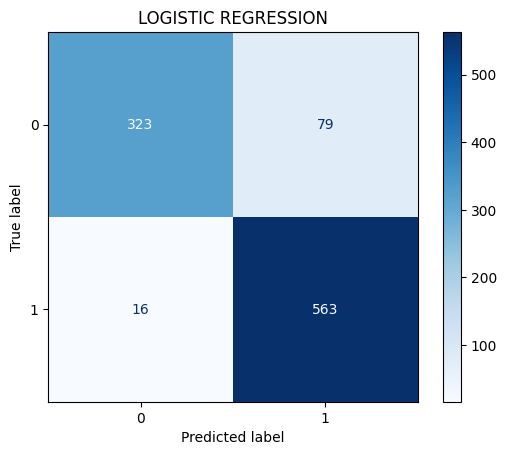

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title('LOGISTIC REGRESSION');

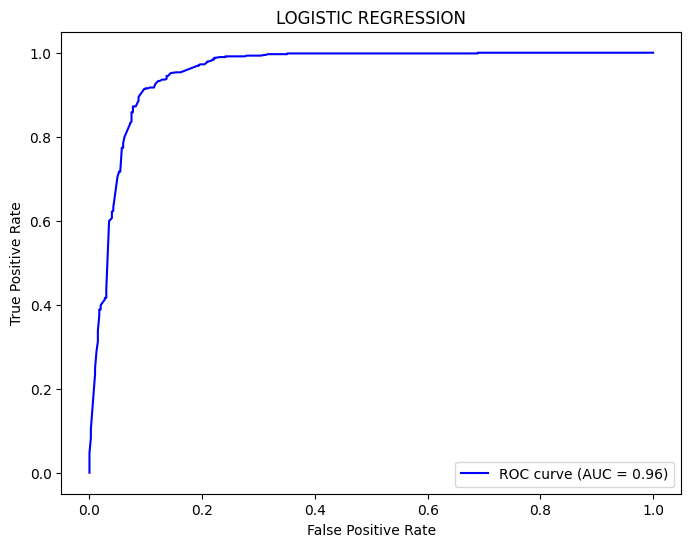

In [26]:
from sklearn.metrics import roc_curve, auc

y_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LOGISTIC REGRESSION')
plt.legend(loc='lower right');

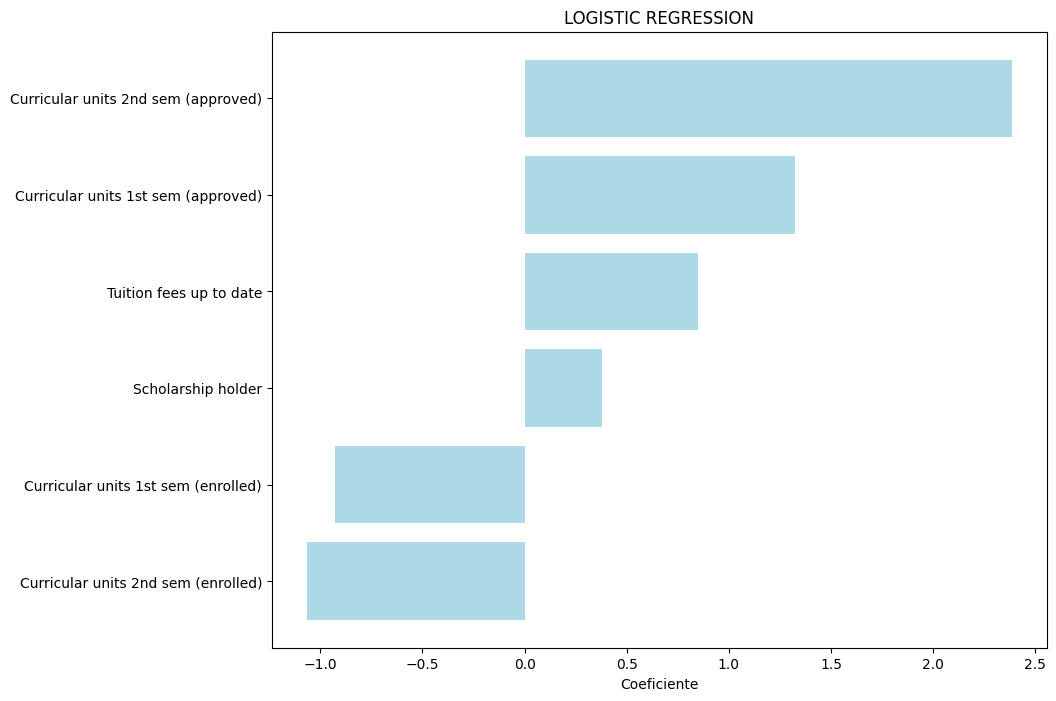

In [27]:
import numpy as np

coefs = grid_search.best_estimator_.named_steps['logreg'].coef_[0]
features = grid_search.best_estimator_.named_steps['scaler'].feature_names_in_
sorted_idx = np.argsort(coefs)
features_sorted = np.array(features)[sorted_idx]
coefs_sorted = coefs[sorted_idx]

plt.figure(figsize=(10, 8))
plt.barh(features_sorted, coefs_sorted, color='lightblue')
plt.xlabel('Coeficiente')
plt.title('LOGISTIC REGRESSION');

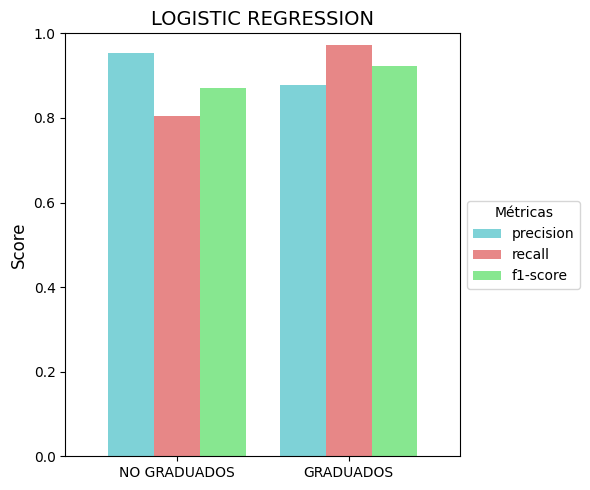

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd


colors = ['#7ed2d7', '#e78787', '#87e790']

report = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report).transpose()
report_df_classes = report_df.iloc[:2, :-1]


fig, ax = plt.subplots(figsize=(6, 5)) 
report_df_classes.plot(kind='bar', ax=ax, color=colors, width=0.8)
ax.set_title('LOGISTIC REGRESSION', fontsize=14)
ax.set_ylabel('Score', fontsize=12)
ax.set_ylim(0, 1)  
ax.set_xticks(range(len(report_df_classes.index)))
ax.set_xticklabels(['NO GRADUADOS', 'GRADUADOS'], fontsize=10, rotation=0)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Métricas')
plt.tight_layout();

In [8]:
prediccion_prueba = grid_search.predict([[1,1,5,5,6,6]])
print(prediccion_prueba)   # correcto, SE GRADUA

[1]


In [9]:
df_target_test = df_academico_test["Target"]
df_test = df_academico_test[["Tuition fees up to date", "Scholarship holder", "Curricular units 1st sem (enrolled)", "Curricular units 1st sem (approved)", "Curricular units 2nd sem (enrolled)", "Curricular units 2nd sem (approved)"]]

In [32]:
df_test.head(1)

,Tuition fees up to date,Scholarship holder,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved)
0,1,0,5,3,5,4


In [33]:
df_target_test.head(1)

0    1
Name: Target, dtype: int64

In [34]:
pre_test = grid_search.predict(df_test)
print(pre_test)

[1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0
 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0
 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0
 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1]


In [35]:
print(df_target_test.shape)
print(pre_test.shape)

print("Unique values in df_target_test:", np.unique(df_target_test))
print("Unique values in pre_test:", np.unique(pre_test))

(363,)
(363,)
Unique values in df_target_test: [0 1]
Unique values in pre_test: [0 1]


In [38]:
accuracy_lr_test = accuracy_score(df_target_test, pre_test)

print("Accuracy:", accuracy_lr_test)
print("Classification Report:")
print(classification_report(df_target_test, pre_test))

Accuracy: 0.8980716253443526
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.80      0.86       147
           1       0.87      0.97      0.92       216

    accuracy                           0.90       363
   macro avg       0.91      0.88      0.89       363
weighted avg       0.90      0.90      0.90       363



### K-Nearest Neighbors Classifier (KNN)

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('knn', KNeighborsClassifier()) 
])

param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11], 
    'knn__weights': ['uniform', 'distance'],  
    'knn__metric': ['euclidean', 'manhattan'] 
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)

y_pred = grid_search.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy_knn)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# with open('../04_models/other_models/trained_model_knn.pkl', 'wb') as f:
#     pickle.dump(grid_search, f)

Mejores hiperparámetros: {'knn__metric': 'manhattan', 'knn__n_neighbors': 9, 'knn__weights': 'uniform'}
Accuracy: 0.9021406727828746
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       402
           1       0.88      0.97      0.92       579

    accuracy                           0.90       981
   macro avg       0.91      0.89      0.90       981
weighted avg       0.91      0.90      0.90       981



In [10]:
pre_test = grid_search.predict(df_test)
accuracy_knn_test = accuracy_score(df_target_test, pre_test)

print("Accuracy:", accuracy_knn_test)
print("Classification Report:")
print(classification_report(df_target_test, pre_test))

Accuracy: 0.8925619834710744
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       147
           1       0.88      0.95      0.91       216

    accuracy                           0.89       363
   macro avg       0.90      0.88      0.89       363
weighted avg       0.89      0.89      0.89       363



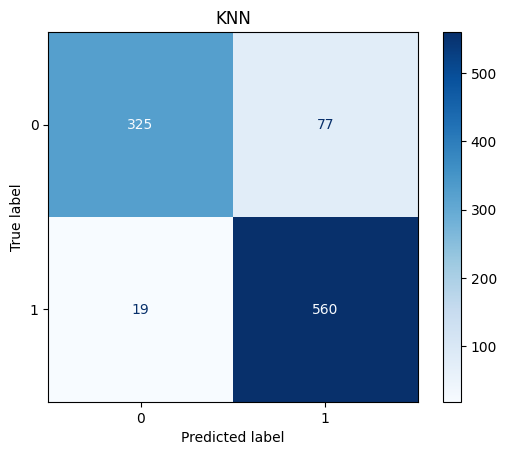

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title('KNN');

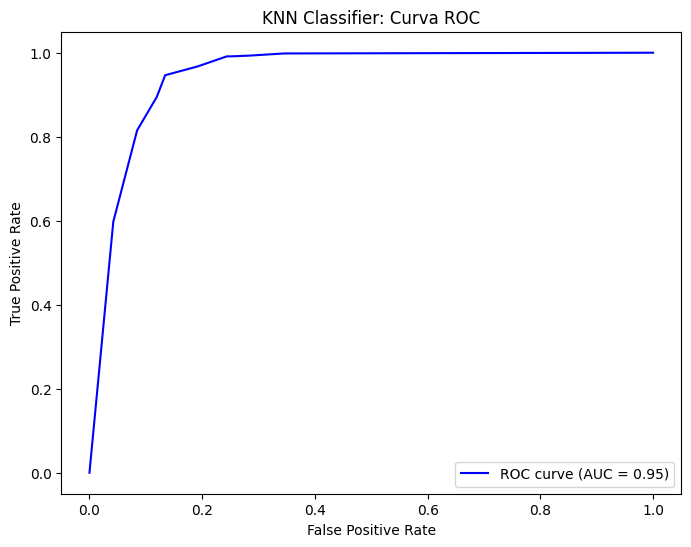

In [20]:
from sklearn.metrics import roc_curve, auc

# Predecir probabilidades para la clase positiva
y_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
#plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN Classifier: Curva ROC')
plt.legend(loc='lower right')
plt.show()

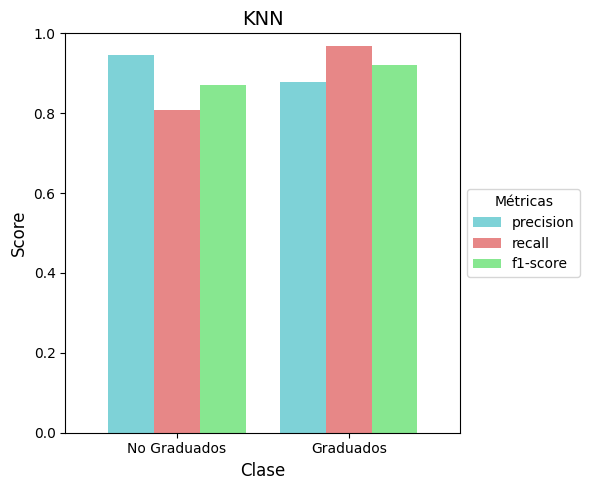

In [23]:
import pandas as pd

# Generar el classification report como diccionario
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, output_dict=True)

# Convertir a DataFrame y seleccionar clases
report_df = pd.DataFrame(report).transpose()
report_df_classes = report_df.iloc[:2, :-1]  # Filtrar solo precisión, recall y f1-score para las clases

# Graficar
colors = ['#7ed2d7', '#e78787', '#87e790']
fig, ax = plt.subplots(figsize=(6, 5))
report_df_classes.plot(kind='bar', ax=ax, color=colors, width=0.8)

# Personalizar diseño
ax.set_title('KNN', fontsize=14)
ax.set_ylabel('Score', fontsize=12)
ax.set_xlabel('Clase', fontsize=12)
ax.set_ylim(0, 1)
ax.set_xticks(range(len(report_df_classes.index)))
ax.set_xticklabels(['No Graduados', 'Graduados'], fontsize=10, rotation=0)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Métricas')

# Mostrar gráfico
plt.tight_layout()
plt.show()

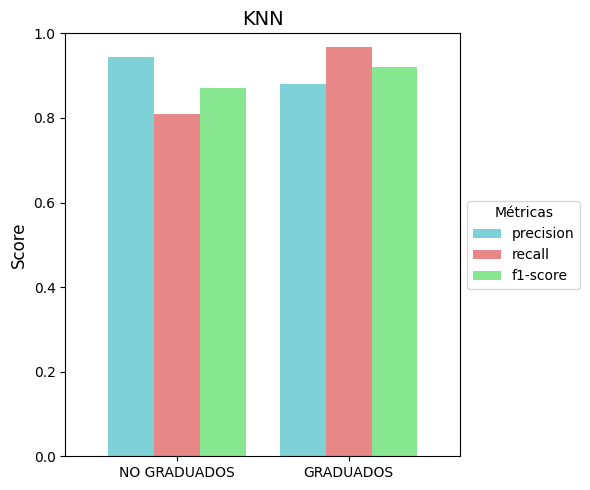

In [16]:
colors = ['#7ed2d7', '#e78787', '#87e790']

report = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report).transpose()
report_df_classes = report_df.iloc[:2, :-1]


fig, ax = plt.subplots(figsize=(6, 5)) 
report_df_classes.plot(kind='bar', ax=ax, color=colors, width=0.8)
ax.set_title('KNN', fontsize=14)
ax.set_ylabel('Score', fontsize=12)
ax.set_ylim(0, 1)  
ax.set_xticks(range(len(report_df_classes.index)))
ax.set_xticklabels(['NO GRADUADOS', 'GRADUADOS'], fontsize=10, rotation=0)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Métricas')
plt.tight_layout();

### Decision Tree Classifier

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('clf', DecisionTreeClassifier(random_state=42)) 
])

param_grid = {
    'clf__max_depth': [None, 10, 20, 30],       
    'clf__min_samples_split': [2, 5, 10],           
    'clf__min_samples_leaf': [1, 2, 4],             
    'clf__criterion': ['gini', 'entropy']           
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)

y_pred = grid_search.predict(X_test)

accuracy_dtc = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy_dtc)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# with open('../04_models/other_models/trained_model_decision_tree_classifier.pkl', 'wb') as f:
#     pickle.dump(grid_search, f)

Mejores hiperparámetros: {'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 10}
Accuracy: 0.9001019367991845
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       402
           1       0.89      0.95      0.92       579

    accuracy                           0.90       981
   macro avg       0.90      0.89      0.89       981
weighted avg       0.90      0.90      0.90       981



In [41]:
pre_test = grid_search.predict(df_test)
accuracy_dtreeclass_test = accuracy_score(df_target_test, pre_test)

print("Accuracy:", accuracy_dtreeclass_test)
print("Classification Report:")
print(classification_report(df_target_test, pre_test))

Accuracy: 0.8760330578512396
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       147
           1       0.87      0.94      0.90       216

    accuracy                           0.88       363
   macro avg       0.88      0.86      0.87       363
weighted avg       0.88      0.88      0.87       363



### Random Forest Classifier

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('rf', RandomForestClassifier(random_state=42))
])


param_grid = {
    'rf__n_estimators': [50, 100, 200],      
    'rf__max_depth': [None, 10, 20, 30],      
    'rf__min_samples_split': [2, 5, 10],      
    'rf__min_samples_leaf': [1, 2, 4],       
    'rf__criterion': ['gini', 'entropy']       
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


print("Mejores hiperparámetros:", grid_search.best_params_)


y_pred = grid_search.predict(X_test)

accuracy_rfc = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy_rfc)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# with open('../04_models/other_models/trained_model_random_forest_classifier.pkl', 'wb') as f:
#     pickle.dump(grid_search, f)

Mejores hiperparámetros: {'rf__criterion': 'entropy', 'rf__max_depth': 10, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Accuracy: 0.9072375127420998
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       402
           1       0.88      0.98      0.93       579

    accuracy                           0.91       981
   macro avg       0.92      0.89      0.90       981
weighted avg       0.91      0.91      0.91       981



In [43]:
pre_test = grid_search.predict(df_test)
accuracy_rndforclass_test = accuracy_score(df_target_test, pre_test)

print("Accuracy:", accuracy_rndforclass_test)
print("Classification Report:")
print(classification_report(df_target_test, pre_test))

Accuracy: 0.8898071625344353
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       147
           1       0.86      0.97      0.91       216

    accuracy                           0.89       363
   macro avg       0.90      0.87      0.88       363
weighted avg       0.90      0.89      0.89       363



### Support Vector Machine

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42)) 
])

param_grid = {
    'svm__C': [0.1, 1, 10, 100],               
    'svm__kernel': ['linear', 'rbf', 'poly'], 
    'svm__gamma': ['scale', 'auto']           
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)


print("Mejores hiperparámetros:", grid_search.best_params_)


y_pred = grid_search.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy_svm)
print("Classification:")
print(classification_report(y_test, y_pred))

Mejores hiperparámetros: {'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Accuracy: 0.8990825688073395
Classification:
              precision    recall  f1-score   support

           0       0.96      0.79      0.86       402
           1       0.87      0.98      0.92       579

    accuracy                           0.90       981
   macro avg       0.91      0.88      0.89       981
weighted avg       0.91      0.90      0.90       981



In [102]:
pre_test = grid_search.predict(df_test)
accuracy_svm_test = accuracy_score(df_target_test, pre_test)

print("Accuracy:", accuracy_svm_test)
print("Classification Report:")
print(classification_report(df_target_test, pre_test))

Accuracy: 0.9008264462809917
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       147
           1       0.88      0.97      0.92       216

    accuracy                           0.90       363
   macro avg       0.91      0.88      0.89       363
weighted avg       0.91      0.90      0.90       363



In [103]:
prediccion_prueba = grid_search.predict([[1,1,5,5,6,6]])
print(prediccion_prueba)   # correcto, SE GRADUA

[1]


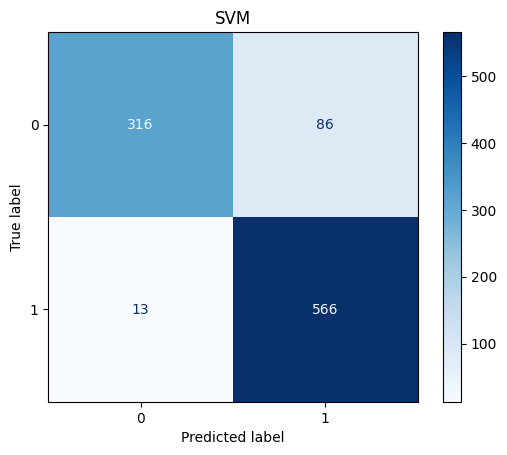

In [104]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title('SVM');

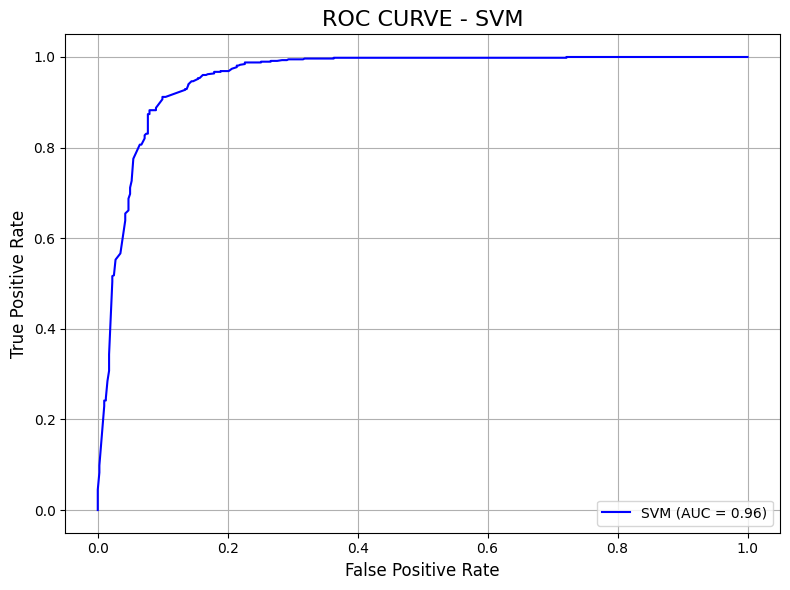

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Configurar el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True, random_state=42))  # Agregar `probability=True`
])

# Definir la cuadrícula de hiperparámetros
param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto']
}

# Ejecutar GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor modelo
mejor_modelo_svm = grid_search.best_estimator_

# Calcular las probabilidades para la clase positiva
y_proba = mejor_modelo_svm.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva

# Calcular FPR, TPR y AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f"SVM (AUC = {roc_auc:.2f})")
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")

# Personalización del gráfico
plt.title("ROC CURVE - SVM", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)
plt.tight_layout();

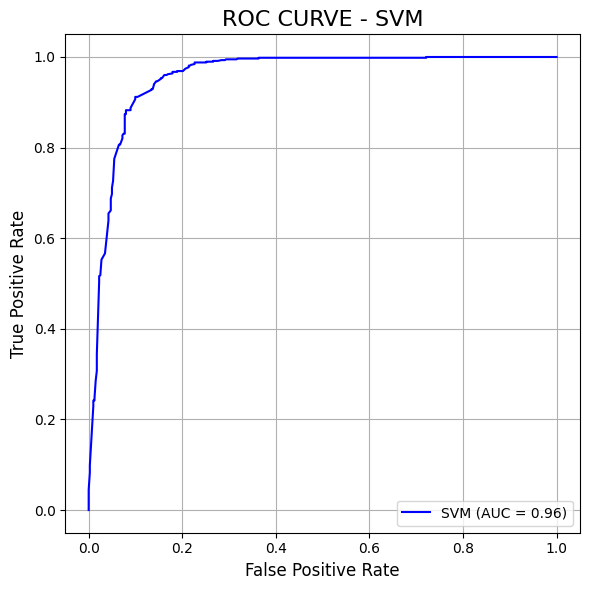

In [118]:
# Graficar la curva ROC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f"SVM (AUC = {roc_auc:.2f})")
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")

# Personalización del gráfico
plt.title("ROC CURVE - SVM", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)
plt.tight_layout();

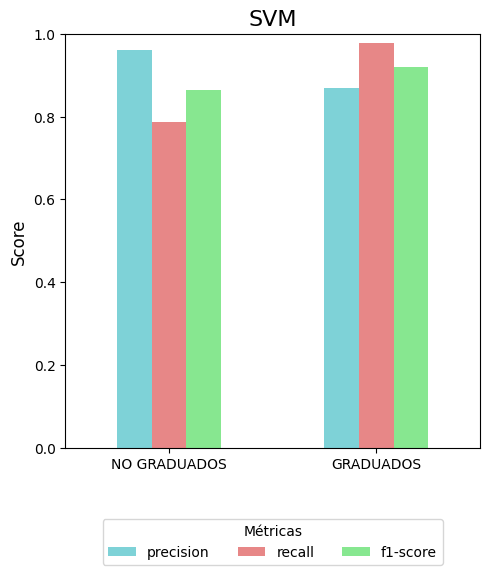

In [113]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Obtener las predicciones del modelo SVM
y_pred = mejor_modelo_svm.predict(X_test)

# Generar el reporte de clasificación como diccionario
reporte = classification_report(y_test, y_pred, output_dict=True)

# Convertir el reporte a un DataFrame para graficar
df_reporte = pd.DataFrame(reporte).transpose()

# Filtrar las métricas de las clases 0 (NO GRADUADOS) y 1 (GRADUADOS)
df_clases = df_reporte.iloc[:2, :-1]  # Seleccionamos las primeras dos filas y eliminamos 'support'

# Graficar las métricas
colors=['#7ed2d7', '#e78787', '#87e790']
df_clases.plot(kind='bar', figsize=(5, 6), color=colors)

# Personalización del gráfico
plt.title("SVM", fontsize=16)
plt.ylabel("Score", fontsize=12)
plt.xticks(ticks=[0, 1], labels=['NO GRADUADOS', 'GRADUADOS'], rotation=0, fontsize=10)
plt.legend(title="Métricas", loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=3, fontsize=10)
plt.ylim(0, 1)  # Asegurar que el rango del eje Y esté entre 0 y 1
plt.tight_layout();

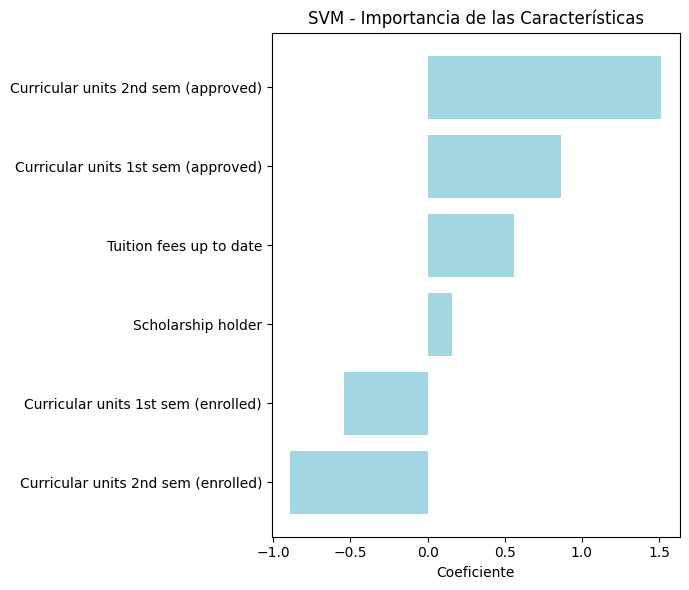

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Verificar si el kernel es lineal
if grid_search.best_params_['svm__kernel'] == 'linear':
    # Extraer coeficientes del modelo SVM lineal
    coeficientes = mejor_modelo_svm.named_steps['svm'].coef_[0]  # Coeficientes para un modelo binario
    
    # Asociar coeficientes con nombres de características
    feature_names = X_train.columns  # Si estás trabajando con un DataFrame
    feature_importances = pd.DataFrame({
        'Feature': feature_names,
        'Importance': coeficientes
    })
    
    # Ordenar las características en el orden específico que quieras
    # Especifica aquí el orden deseado
    orden_deseado = [
        "Curricular units 2nd sem (approved)",
        "Curricular units 1st sem (approved)",
        "Tuition fees up to date",
        "Scholarship holder",
        "Curricular units 1st sem (enrolled)",
        "Curricular units 2nd sem (enrolled)"
    ]
    feature_importances['AbsImportance'] = np.abs(feature_importances['Importance'])
    feature_importances = feature_importances.set_index('Feature').reindex(orden_deseado).reset_index()

    # Graficar
    plt.figure(figsize=(7, 6))
    plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='#A1D6E2')
    plt.xlabel("Coeficiente")
    plt.title("SVM - Importancia de las Características")
    plt.tight_layout()
    plt.gca().invert_yaxis()  # Invertir el orden para que las más importantes estén arriba
    plt.show()
else:
    print("El kernel del SVM no es lineal. No se pueden calcular coeficientes directamente.")


In [13]:
# MI MEJOR MODELO FINALMENTE

import pickle

with open('../04_models/final_model.pkl', 'wb') as f:
    pickle.dump(grid_search, f)

### Gradient Boosting Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingClassifier(random_state=42)) 
])


param_grid = {
    'gb__n_estimators': [50, 100, 200],          
    'gb__learning_rate': [0.01, 0.1, 0.2],       
    'gb__max_depth': [3, 5, 7],                
    'gb__min_samples_split': [2, 5, 10],         
    'gb__min_samples_leaf': [1, 2, 4]             
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)


grid_search.fit(X_train, y_train)


print("Mejores hiperparámetros:", grid_search.best_params_)


y_pred = grid_search.predict(X_test)


accuracy_gbc = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy_gbc)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# with open('../04_models/other_models/trained_model_gradient_boosting_classifier.pkl', 'wb') as f:
#     pickle.dump(grid_search, f)

Mejores hiperparámetros: {'gb__learning_rate': 0.01, 'gb__max_depth': 5, 'gb__min_samples_leaf': 1, 'gb__min_samples_split': 5, 'gb__n_estimators': 100}
Accuracy: 0.8980632008154944
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.78      0.86       402
           1       0.87      0.98      0.92       579

    accuracy                           0.90       981
   macro avg       0.91      0.88      0.89       981
weighted avg       0.91      0.90      0.90       981



In [47]:
pre_test = grid_search.predict(df_test)
accuracy_grdboostclass_test = accuracy_score(df_target_test, pre_test)

print("Accuracy:", accuracy_grdboostclass_test)
print("Classification Report:")
print(classification_report(df_target_test, pre_test))

Accuracy: 0.8898071625344353
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.77      0.85       147
           1       0.86      0.97      0.91       216

    accuracy                           0.89       363
   macro avg       0.91      0.87      0.88       363
weighted avg       0.90      0.89      0.89       363



## MODELOS NO SUPERVISADOS

### CLUSTERING

In [ ]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),          
    ('kmeans', KMeans(random_state=42))    
])


param_grid = {
    'kmeans__n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10],  
    'kmeans__init': ['k-means++', 'random'],             
    'kmeans__n_init': [10, 20, 30]                     
}


silhouette_scorer = make_scorer(silhouette_score)
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=silhouette_scorer, n_jobs=-1)
grid_search.fit(X)


print("Mejores hiperparámetros:", grid_search.best_params_)


best_model_cluster = grid_search.best_estimator_
labels = best_model_cluster.predict(X)


final_silhouette_score = silhouette_score(X, labels)
print("Silhouette Score del modelo final:", final_silhouette_score)

# with open('../04_models/other_models/trained_model_clustering.pkl', 'wb') as f:
#     pickle.dump(grid_search, f)

Mejores hiperparámetros: {'kmeans__init': 'k-means++', 'kmeans__n_clusters': 2, 'kmeans__n_init': 10}
Silhouette Score del modelo final: 0.4621741135528947


In [50]:
labels = best_model_cluster.predict(df_test)


final_silhouette_score_test = silhouette_score(df_test, labels)
print("Silhouette Score del modelo final:", final_silhouette_score_test)

Silhouette Score del modelo final: 0.418943594055515


### PCA

In [41]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=10))
pca_pipe.fit(df_academico_train)

modelo_pca = pca_pipe['pca']

pca_pipe['pca']

PCA(n_components=10)

In [42]:
# Se convierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data = modelo_pca.components_,
    columns = df_academico_train.columns,
    index = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10']
)

,Daytime/evening attendance,Previous qualification (grade),Mother's qualification,Father's qualification,Admission grade,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Target
PC1,0.004785,0.015508,0.003267,0.010208,0.026836,-0.010244,-0.056785,0.111723,-0.081104,0.052309,...,0.336991,0.279310,0.368876,0.274048,0.268109,0.329641,0.280389,0.353136,0.278560,0.193022
PC2,-0.209202,-0.158016,0.151018,0.106222,-0.130050,-0.029806,0.180382,-0.269250,0.171499,-0.238499,...,0.197646,0.200946,-0.068316,-0.236331,0.282001,0.147190,0.122094,-0.144868,-0.261875,-0.352191
PC3,-0.271429,-0.186321,0.561523,0.556784,-0.191590,-0.015106,-0.130559,0.134066,-0.162882,0.191781,...,-0.062496,-0.039574,-0.003393,0.077429,-0.128947,-0.052425,-0.027615,0.028780,0.098415,0.132956
PC4,-0.208767,0.596902,0.138439,0.141465,0.630115,-0.014598,-0.121782,0.088231,0.039946,-0.024580,...,0.002654,-0.118246,0.021761,-0.093047,0.146930,-0.041198,-0.161045,0.005561,-0.074836,0.044942
PC5,0.109621,0.203775,0.158116,0.145467,0.176811,-0.006470,0.599433,-0.458730,-0.157648,0.134381,...,-0.048832,0.124473,0.004357,0.213445,-0.165417,-0.035379,0.177128,-0.008214,0.156485,-0.076540
PC6,0.417871,0.015009,0.119958,0.215964,-0.069588,0.262597,0.031898,-0.037175,-0.313581,0.344986,...,0.135168,-0.145285,0.015224,-0.304419,0.245514,0.124997,-0.193137,0.004652,-0.278141,-0.028975
PC7,-0.294250,-0.126937,-0.063066,-0.163869,-0.118572,-0.200300,-0.009848,0.036422,-0.287760,-0.035583,...,0.001186,-0.160377,0.058459,-0.071519,0.076220,-0.028372,-0.218582,0.069907,-0.010543,0.170591
PC8,-0.215167,-0.024048,-0.051930,-0.076143,-0.013996,0.939330,0.015576,0.025957,0.066004,-0.044561,...,-0.039877,0.005414,0.010220,0.067525,-0.026762,-0.043907,0.020247,0.017257,0.071229,0.030840
PC9,0.409492,0.063597,0.239098,0.219674,0.001558,0.014546,-0.301848,0.197937,0.406889,-0.222648,...,-0.011934,0.170944,-0.059362,0.041220,-0.058858,-0.011051,0.178631,-0.079488,-0.001844,-0.100739
PC10,-0.025844,-0.156567,-0.038083,0.021044,0.002915,-0.064145,0.227275,-0.040637,0.707709,0.512237,...,-0.047421,-0.142006,0.088069,-0.019819,0.123161,-0.077715,-0.161831,0.107153,0.041155,0.202496


------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.28440435 0.42046589 0.49745771 0.56516596 0.62046025 0.66931559
 0.71302682 0.75603607 0.79572577 0.83101846]


Text(0, 0.5, 'Por. varianza acumulada')

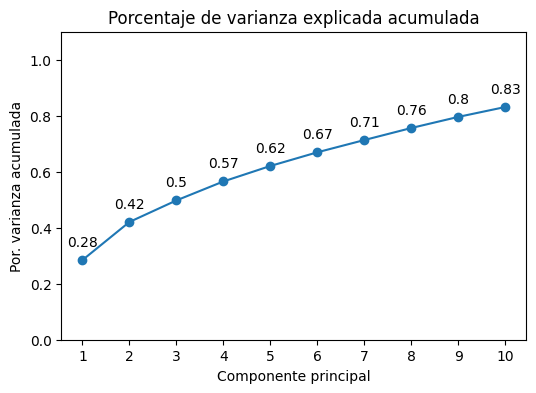

In [43]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))


ax.plot(
    np.arange(modelo_pca.n_components_) + 1,
    prop_varianza_acum,
    marker='o'
)


for x, y in zip(np.arange(modelo_pca.n_components_) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x, y),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')

In [44]:
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=7))
pca_pipe.fit(df_academico_train)


X_train_pca = pca_pipe.transform(df_academico_train)
X_test_pca = pca_pipe.transform(df_academico_test)


pca_train_df = pd.DataFrame(X_train_pca, columns=[f'PCA{i+1}' for i in range(7)])
pca_test_df = pd.DataFrame(X_test_pca, columns=[f'PCA{i+1}' for i in range(7)])


print("Datos de entrenamiento después de PCA (primeros 5 registros):")
print(pca_train_df.head())
print("\nDatos de prueba después de PCA (primeros 5 registros):")
print(pca_test_df.head())

Datos de entrenamiento después de PCA (primeros 5 registros):
       PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7
0 -2.744250  1.847926  2.263046  1.209081 -0.643976  0.498155  0.558518
1  1.220951 -1.206534 -0.933138 -1.795604 -0.818824 -0.410143 -0.263175
2  1.317610  2.656308 -2.779175 -1.813269  2.217389  0.508605 -0.065586
3 -3.881452  1.185844 -0.283756  2.277641 -1.768377 -0.409911  1.625378
4  0.462517 -1.031351  1.410428  0.007016  0.042180  0.339019 -0.808919

Datos de prueba después de PCA (primeros 5 registros):
       PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7
0 -0.243321 -0.660677  0.234288 -1.239882 -0.443958 -0.253315  0.064480
1 -0.516077  1.126598  0.366356 -0.981739  3.434471  0.497278 -0.509625
2 -0.845947 -0.755307 -4.045508  4.037779  2.455942  0.514149  3.965043
3  1.336295 -1.842498 -0.473529  0.093876  0.205326  0.212361 -0.044169
4 -2.953083  2.286757 -0.158735 -1.329699 -1.960175  0.263967 -0.187435


Accuracy del modelo con mejores hiperparámetros: 0.9393939393939394

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       147
           1       0.94      0.96      0.95       216

    accuracy                           0.94       363
   macro avg       0.94      0.93      0.94       363
weighted avg       0.94      0.94      0.94       363



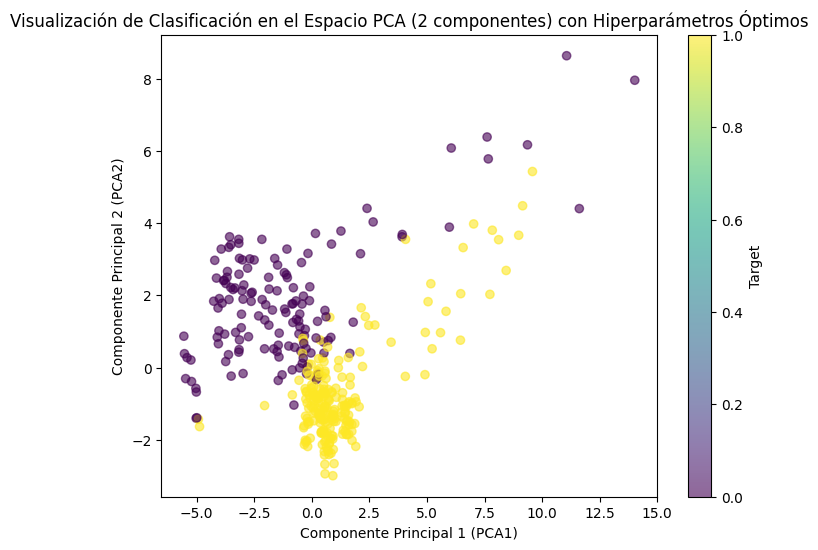

In [45]:
# voy a hacer una prueba con los mejores parametros de mi modelo de Logistic Regression que he realizado previamente

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


model_lr_bueno = LogisticRegression(C=1, penalty='l1', solver='liblinear')
model_lr_bueno.fit(pca_train_df, df_academico_train['Target']) 

y_pred = model_lr_bueno.predict(pca_test_df)
accuracy = accuracy_score(df_academico_test['Target'], y_pred)
print("Accuracy del modelo con mejores hiperparámetros:", accuracy)
print("\nReporte de clasificación:")
print(classification_report(df_academico_test['Target'], y_pred))

# Visualización de los resultados en los dos primeros componentes principales
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_test_df['PCA1'], pca_test_df['PCA2'], c=y_pred, cmap='viridis', alpha=0.6)
plt.xlabel("Componente Principal 1 (PCA1)")
plt.ylabel("Componente Principal 2 (PCA2)")
plt.title("Visualización de Clasificación en el Espacio PCA (2 componentes) con Hiperparámetros Óptimos")
plt.colorbar(scatter, label="Target");

In [ ]:
# with open('../04_models/other_models/trained_model_pca.pkl', 'wb') as f:
#     pickle.dump(grid_search, f)

## REDES NEURONALES

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

In [48]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2286, 6)
(981, 6)
(2286,)
(981,)


In [49]:
from keras.regularizers import l2

In [50]:
model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.01), input_shape=(6,)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [51]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,217 (36.00 KB)

 Trainable params: 9,217 (36.00 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
from keras.callbacks import EarlyStopping

earlystopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [54]:
history = model.fit(X_train, 
                    y_train, 
                    batch_size=32,
                    validation_split=0.2, 
                    epochs=50, 
                    callbacks=[earlystopping])

Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7251 - loss: 1.4475 - val_accuracy: 0.8777 - val_loss: 0.8970
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8838 - loss: 0.8443 - val_accuracy: 0.8755 - val_loss: 0.6898
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8871 - loss: 0.6727 - val_accuracy: 0.8865 - val_loss: 0.5837
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8969 - loss: 0.5657 - val_accuracy: 0.8865 - val_loss: 0.5290
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8946 - loss: 0.4954 - val_accuracy: 0.8886 - val_loss: 0.4808
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8921 - loss: 0.4810 - val_accuracy: 0.8908 - val_loss: 0.4531
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9010 - loss: 0.4240 - val_accuracy: 0.8865 - val_loss: 0.4468
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9037 - loss: 0.4098 - val_accuracy: 0.8886 - val_loss

<Axes: >

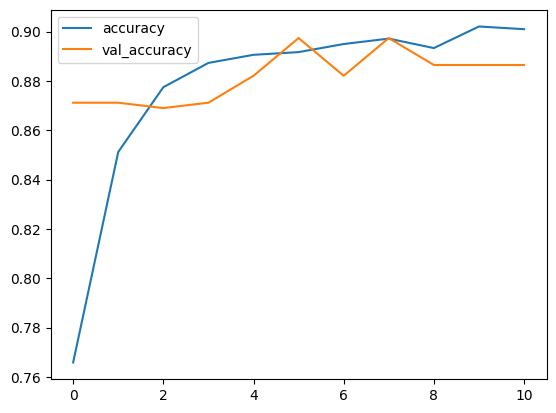

In [27]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

In [55]:
predictions = model.predict(X_test)
predictions[:5]

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[0.01031481],
       [0.00742803],
       [0.00272184],
       [0.90646875],
       [0.23523717]], dtype=float32)

In [56]:
predicted_labels = (predictions > 0.5).astype(int)

print(predicted_labels[:5])

[[0]
 [0]
 [0]
 [1]
 [0]]


In [57]:
print("Predicciones:", predicted_labels[:5])
print("Etiquetas reales:", y_test[:5])

Predicciones: [[0]
 [0]
 [0]
 [1]
 [0]]
Etiquetas reales: 3082    0
134     0
411     0
203     1
2936    1
Name: Target, dtype: int64


In [58]:
from sklearn.metrics import accuracy_score

accuracy_redes_neuronales = accuracy_score(y_test, predicted_labels)
print("Precisión en el conjunto de prueba:", accuracy_redes_neuronales)

Precisión en el conjunto de prueba: 0.9031600407747197


In [59]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, predicted_labels)
conf_matrix

array([[328,  74],
       [ 21, 558]])

In [60]:
from sklearn.metrics import classification_report

report = classification_report(y_test, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.82      0.87       402
           1       0.88      0.96      0.92       579

    accuracy                           0.90       981
   macro avg       0.91      0.89      0.90       981
weighted avg       0.91      0.90      0.90       981



In [61]:
predictions = model.predict(df_test)

predicted_labels = (predictions > 0.5).astype(int)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [62]:
accuracy_redes_neuronales = accuracy_score(df_target_test, predicted_labels)
print("Precisión en el conjunto de prueba:", accuracy_redes_neuronales)

Precisión en el conjunto de prueba: 0.8787878787878788


In [63]:
print(classification_report(df_target_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       147
           1       0.87      0.93      0.90       216

    accuracy                           0.88       363
   macro avg       0.88      0.87      0.87       363
weighted avg       0.88      0.88      0.88       363



In [64]:
print("Etiquetas reales:", df_target_test.values[:10])
print("Predicciones    :", predicted_labels[:10].flatten())

Etiquetas reales: [1 0 0 1 0 1 0 1 0 0]
Predicciones    : [0 1 0 1 0 1 0 0 0 0]


In [65]:
prediccion_prueba = model.predict(np.array([[1, 1, 5, 5, 6, 6]]))
prediccion_etiqueta = (prediccion_prueba > 0.5).astype(int)
prediccion_etiqueta  # CORRECTO, se gradua

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[1]])

In [66]:
prediccion_prueba = model.predict(np.array([[0, 0, 5, 1, 6, 0]]))
prediccion_etiqueta = (prediccion_prueba > 0.5).astype(int)
prediccion_etiqueta  # CORRECTO, NO se gradua

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


array([[0]])

In [ ]:
# with open('../04_models/other_models/trained_model_red_neuronal.pkl', 'wb') as f:
#     pickle.dump(grid_search, f)

In [ ]:
#!pip install scikeras

# intente implementar CROSS VALIDATION pero no fui capaz

# RESULTADOS - pruebas con TEST

In [61]:
print("Precisión de los Modelos Supervisados:")
print("")
print("- Support Vector Machine Accuracy:", round(accuracy_svm_test, 4))
print("- Logistic Regression Accuracy:", round(accuracy_lr_test, 4))
print("- K-Nearest Neighbors Accuracy:", round(accuracy_knn_test, 4))
print("- Gradient Boosting Classifier Accuracy:", round(accuracy_grdboostclass_test, 4))
print("- Random Forest Accuracy:", round(accuracy_rndforclass_test, 4))
print("- Decision Tree Accuracy:", round(accuracy_dtreeclass_test, 4))

Precisión de los Modelos Supervisados:

- Support Vector Machine Accuracy: 0.9008
- Logistic Regression Accuracy: 0.8981
- K-Nearest Neighbors Accuracy: 0.8926
- Gradient Boosting Classifier Accuracy: 0.8898
- Random Forest Accuracy: 0.8898
- Decision Tree Accuracy: 0.876


In [64]:
print("Precisión de los Modelos NO Supervisados:")
print("")
print("- Clustering final silhouette score:", final_silhouette_score_test)
print("- aplicada regla de 3, SCORE: 0.709")
print("")
print("- PCA con Logistic Regression(mejores parametros): 0.94")

Precisión de los Modelos NO Supervisados:

- Clustering final silhouette score: 0.418943594055515
- aplicada regla de 3, SCORE: 0.709

- PCA con Logistic Regression(mejores parametros): 0.94


In [54]:
print("Precisión del Modelo de REDES NEURONALES:")
print("")
print("Precisión REDES NEURONALES:", round(accuracy_redes_neuronales,4))

Precisión del Modelo de REDES NEURONALES:

Precisión REDES NEURONALES: 0.8898


#
___

In [6]:
data = {
    'Modelo': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting', 'PCA', 'Red Neuronal'],
    'Precision': [0.91, 0.90, 0.88, 0.90, 0.91, 0.90, 0.94, 0.88],
    'F1-Score': [0.90, 0.89, 0.87, 0.89, 0.89, 0.89, 0.94, 0.88],
    'Recall': [0.89, 0.88, 0.86, 0.87, 0.88, 0.87, 0.93, 0.87]
    
}

df_metrics = pd.DataFrame(data)

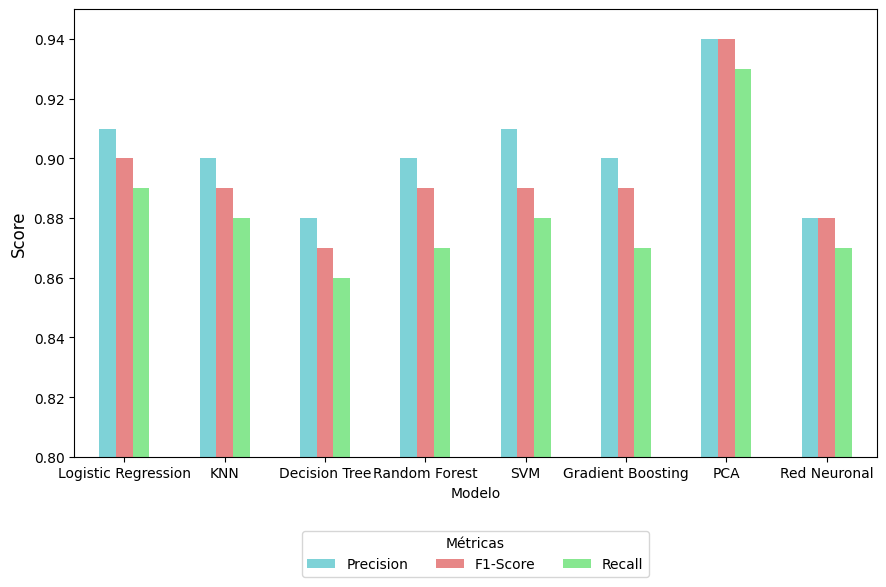

In [7]:
fig, ax = plt.subplots(figsize=(9, 6))

df_metrics.set_index('Modelo').plot(kind='bar', ax=ax, color=['#7ed2d7', '#e78787', '#87e790'])
ax.set_ylabel('Score', fontsize=12)
ax.set_ylim(0.80, 0.95) 
plt.xticks(rotation=360, fontsize=10)
ax.legend(title='Métricas', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)  # Leyenda debajo
plt.tight_layout();

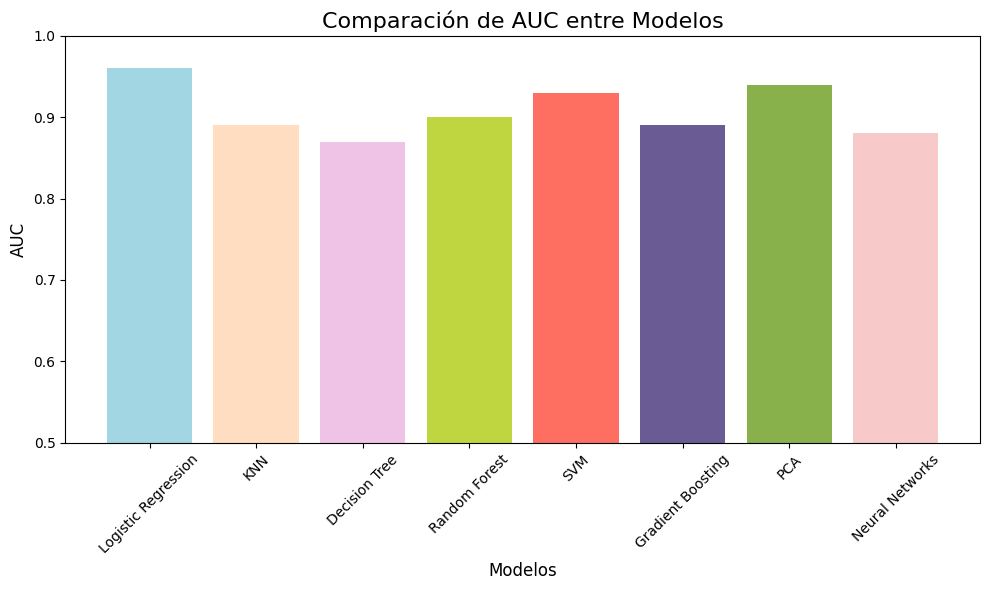

In [39]:
# Diccionario con los valores AUC
roc_data = {
    'Logistic Regression': 0.96,
    'KNN': 0.89,
    'Decision Tree': 0.87,
    'Random Forest': 0.90,
    'SVM': 0.93,
    'Gradient Boosting': 0.89,
    'PCA': 0.94,
    'Neural Networks': 0.88
}

# Crear un DataFrame para graficar
import pandas as pd
df_auc = pd.DataFrame(list(roc_data.items()), columns=['Modelo', 'AUC'])

# Graficar
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(df_auc['Modelo'], df_auc['AUC'], color=['#A1D6E2', '#FFDDC1', '#EFC3E6', '#BFD641', '#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9'])
plt.ylim(0.5, 1)  # Ajustar el eje Y para resaltar diferencias

# Personalización
plt.title('Comparación de AUC entre Modelos', fontsize=16)
plt.ylabel('AUC', fontsize=12)
plt.xlabel('Modelos', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

# Mostrar
plt.tight_layout()
plt.show()


Entrenando Logistic Regression...
Entrenando KNN...
Entrenando Decision Tree...
Entrenando Random Forest...
Entrenando SVM...
Entrenando Gradient Boosting...
Entrenando Red Neuronal...
Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6741 - loss: 0.5530
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8814 - loss: 0.2784
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8959 - loss: 0.2807
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9042 - loss: 0.2701
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9089 - loss: 0.2471
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9097 - loss: 0.2570
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9005 - loss: 0.2840
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9054 - loss: 0.2546
Epoch 9/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8947 - loss: 0.2794
Epoch 10/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accura

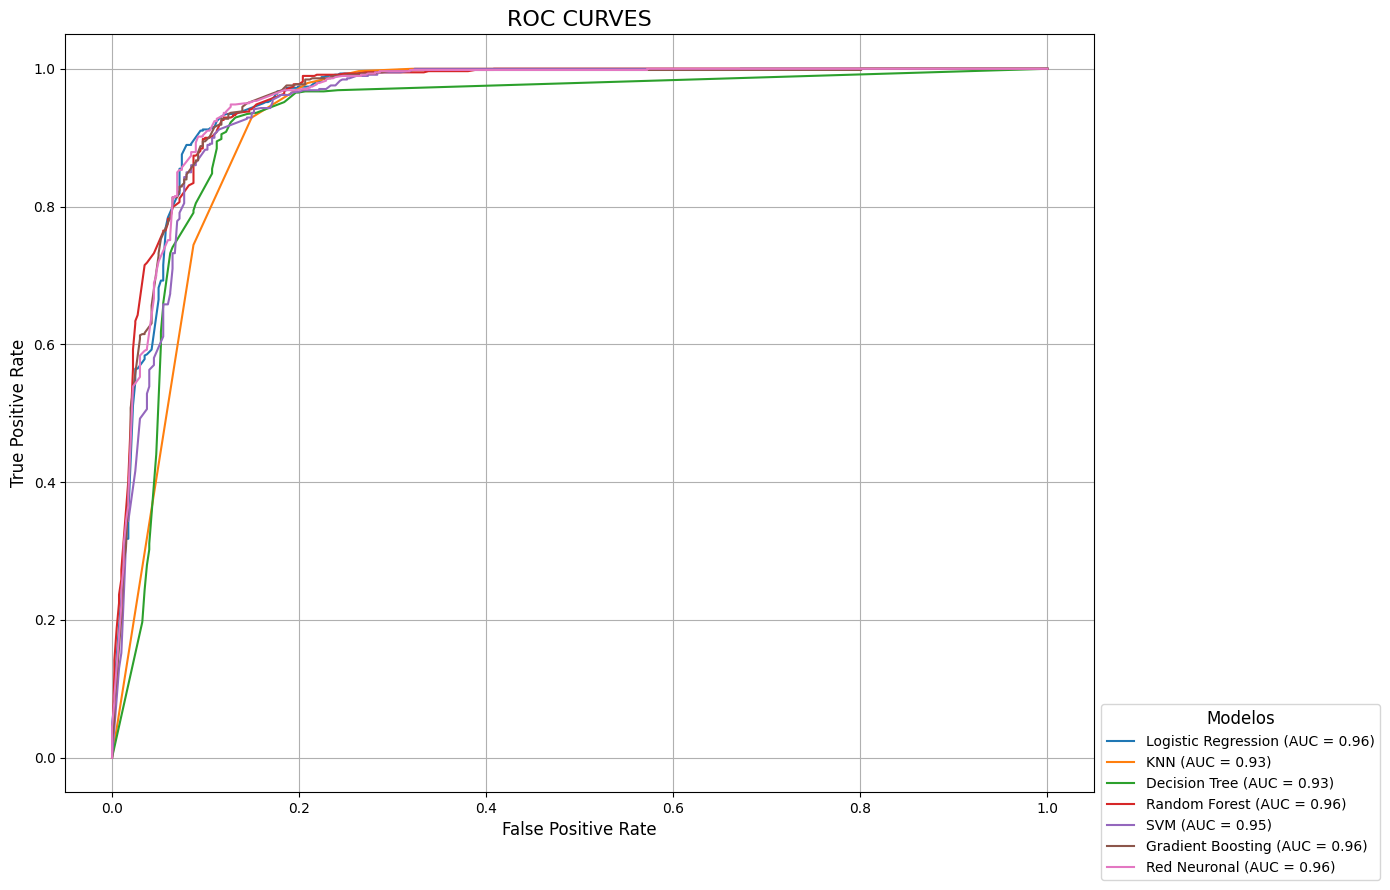

In [99]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Paso 1: Inicializar todos los modelos
modelos = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Red Neuronal": Sequential([
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Salida en probabilidades
    ])
}

# Compilar la red neuronal
modelos["Red Neuronal"].compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Paso 2: Entrenar todos los modelos
roc_data = {}

for nombre, modelo in modelos.items():
    print(f"Entrenando {nombre}...")
    try:
        if nombre != "Red Neuronal":
            modelo.fit(X_train, y_train)  # Entrenar modelos de scikit-learn
        else:
            # Entrenar el modelo de redes neuronales
            modelos["Red Neuronal"].fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

        # Paso 3: Calcular probabilidades para ROC
        if hasattr(modelo, "predict_proba"):  # Modelos con predict_proba
            y_proba = modelo.predict_proba(X_test)[:, 1]
        elif hasattr(modelo, "decision_function"):  # Modelos como SVM
            y_proba = modelo.decision_function(X_test)
        elif hasattr(modelo, "predict"):  # Redes Neuronales
            y_proba = modelo.predict(X_test).flatten()
        else:
            raise AttributeError(f"El modelo {nombre} no soporta predict_proba ni decision_function.")
        
        # Calcular FPR, TPR y AUC
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        roc_data[nombre] = (fpr, tpr, roc_auc)

    except Exception as e:
        print(f"Error con el modelo {nombre}: {e}")

# Paso 4: Graficar todas las curvas ROC
plt.figure(figsize=(14, 9))
for nombre, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{nombre} (AUC = {roc_auc:.2f})")


# Personalización del gráfico
plt.title("ROC CURVES", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="center left", bbox_to_anchor=(1, 0), fontsize=10, title="Modelos", title_fontsize=12)
plt.grid(True)
plt.tight_layout()

# Mostrar gráfico
plt.show()
